### Variable Selection and EDA

This code runs variable selection and EDA on the training data and features from the feature engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LassoCV

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

import boto3
from sagemaker import get_execution_role

# There is a warning when using distplot in seaborn that needs to be fixed in the package - supressing it for now
warnings.filterwarnings("ignore", module="matplotlib")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from VarSelection import VarSelection as vs
from FeatureProfiler import FeatureProfiler as fp

In [2]:
role = get_execution_role()
region = boto3.Session().region_name
bucket='udacity-machine-learning-capstone-data'
key = 'udacity_capstone_data/all_trans.pkl'

In [3]:
s3c = boto3.client('s3')

# Train
key = 'train_df_features.csv' 
obj = s3c.get_object(Bucket= bucket, Key= key) 
train_df = pd.read_csv(obj['Body'])

In [4]:
train_df = train_df.replace([np.inf, -np.inf], 0)
train_df.head()

,CUST_CODE,PROD_CODE,TARGET,SPEND_PROD_CODE_52,QUANTITY_PROD_CODE_52,VISITS_PROD_CODE_52,SPEND_PROD_CODE_26,QUANTITY_PROD_CODE_26,VISITS_PROD_CODE_26,SPEND_PROD_CODE_8,QUANTITY_PROD_CODE_8,VISITS_PROD_CODE_8,SPEND_PROD_CODE_1,QUANTITY_PROD_CODE_1,VISITS_PROD_CODE_1,SPEND_PROD_CODE_10_52,QUANTITY_PROD_CODE_10_52,VISITS_PROD_CODE_10_52,SPEND_PROD_CODE_10_26,QUANTITY_PROD_CODE_10_26,VISITS_PROD_CODE_10_26,SPEND_PROD_CODE_10_8,QUANTITY_PROD_CODE_10_8,VISITS_PROD_CODE_10_8,SPEND_PROD_CODE_10_1,QUANTITY_PROD_CODE_10_1,VISITS_PROD_CODE_10_1,SPEND_PROD_CODE_20_52,QUANTITY_PROD_CODE_20_52,VISITS_PROD_CODE_20_52,SPEND_PROD_CODE_20_26,QUANTITY_PROD_CODE_20_26,VISITS_PROD_CODE_20_26,SPEND_PROD_CODE_20_8,QUANTITY_PROD_CODE_20_8,VISITS_PROD_CODE_20_8,SPEND_PROD_CODE_20_1,QUANTITY_PROD_CODE_20_1,VISITS_PROD_CODE_20_1,SPEND_PROD_CODE_30_52,QUANTITY_PROD_CODE_30_52,VISITS_PROD_CODE_30_52,SPEND_PROD_CODE_30_26,QUANTITY_PROD_CODE_30_26,VISITS_PROD_CODE_30_26,SPEND_PROD_CODE_30_8,QUANTITY_PROD_CODE_30_8,VISITS_PROD_CODE_30_8,SPEND_PROD_CODE_30_1,QUANTITY_PROD_CODE_30_1,VISITS_PROD_CODE_30_1,SPEND_PROD_CODE_40_52,QUANTITY_PROD_CODE_40_52,VISITS_PROD_CODE_40_52,SPEND_PROD_CODE_40_26,QUANTITY_PROD_CODE_40_26,VISITS_PROD_CODE_40_26,SPEND_PROD_CODE_40_8,QUANTITY_PROD_CODE_40_8,VISITS_PROD_CODE_40_8,SPEND_PROD_CODE_40_1,QUANTITY_PROD_CODE_40_1,VISITS_PROD_CODE_40_1,CHNG_SPEND_PROD_CODE_1_8,CHNG_QUANTITY_PROD_CODE_1_8,CHNG_VISITS_PROD_CODE_1_8,CHNG_SPEND_PROD_CODE_1_26,CHNG_QUANTITY_PROD_CODE_1_26,CHNG_VISITS_PROD_CODE_1_26,CHNG_SPEND_PROD_CODE_1_52,CHNG_QUANTITY_PROD_CODE_1_52,CHNG_VISITS_PROD_CODE_1_52,CHNG_SPEND_PROD_CODE_8_26,CHNG_QUANTITY_PROD_CODE_8_26,CHNG_VISITS_PROD_CODE_8_26,CHNG_SPEND_PROD_CODE_8_52,CHNG_QUANTITY_PROD_CODE_8_52,CHNG_VISITS_PROD_CODE_8_52,CHNG_SPEND_PROD_CODE_26_52,CHNG_QUANTITY_PROD_CODE_26_52,CHNG_VISITS_PROD_CODE_26_52,CHNG_SPEND_PROD_CODE_10_1_8,CHNG_QUANTITY_PROD_CODE_10_1_8,CHNG_VISITS_PROD_CODE_10_1_8,CHNG_SPEND_PROD_CODE_10_1_26,CHNG_QUANTITY_PROD_CODE_10_1_26,CHNG_VISITS_PROD_CODE_10_1_26,CHNG_SPEND_PROD_CODE_10_1_52,CHNG_QUANTITY_PROD_CODE_10_1_52,CHNG_VISITS_PROD_CODE_10_1_52,CHNG_SPEND_PROD_CODE_10_8_26,CHNG_QUANTITY_PROD_CODE_10_8_26,CHNG_VISITS_PROD_CODE_10_8_26,CHNG_SPEND_PROD_CODE_10_8_52,CHNG_QUANTITY_PROD_CODE_10_8_52,CHNG_VISITS_PROD_CODE_10_8_52,CHNG_SPEND_PROD_CODE_10_26_52,CHNG_QUANTITY_PROD_CODE_10_26_52,CHNG_VISITS_PROD_CODE_10_26_52,CHNG_SPEND_PROD_CODE_20_1_8,CHNG_QUANTITY_PROD_CODE_20_1_8,CHNG_VISITS_PROD_CODE_20_1_8,CHNG_SPEND_PROD_CODE_20_1_26,CHNG_QUANTITY_PROD_CODE_20_1_26,CHNG_VISITS_PROD_CODE_20_1_26,CHNG_SPEND_PROD_CODE_20_1_52,CHNG_QUANTITY_PROD_CODE_20_1_52,CHNG_VISITS_PROD_CODE_20_1_52,CHNG_SPEND_PROD_CODE_20_8_26,CHNG_QUANTITY_PROD_CODE_20_8_26,CHNG_VISITS_PROD_CODE_20_8_26,CHNG_SPEND_PROD_CODE_20_8_52,CHNG_QUANTITY_PROD_CODE_20_8_52,CHNG_VISITS_PROD_CODE_20_8_52,CHNG_SPEND_PROD_CODE_20_26_52,CHNG_QUANTITY_PROD_CODE_20_26_52,CHNG_VISITS_PROD_CODE_20_26_52,CHNG_SPEND_PROD_CODE_30_1_8,CHNG_QUANTITY_PROD_CODE_30_1_8,CHNG_VISITS_PROD_CODE_30_1_8,CHNG_SPEND_PROD_CODE_30_1_26,CHNG_QUANTITY_PROD_CODE_30_1_26,CHNG_VISITS_PROD_CODE_30_1_26,CHNG_SPEND_PROD_CODE_30_1_52,CHNG_QUANTITY_PROD_CODE_30_1_52,CHNG_VISITS_PROD_CODE_30_1_52,CHNG_SPEND_PROD_CODE_30_8_26,CHNG_QUANTITY_PROD_CODE_30_8_26,CHNG_VISITS_PROD_CODE_30_8_26,CHNG_SPEND_PROD_CODE_30_8_52,CHNG_QUANTITY_PROD_CODE_30_8_52,CHNG_VISITS_PROD_CODE_30_8_52,CHNG_SPEND_PROD_CODE_30_26_52,CHNG_QUANTITY_PROD_CODE_30_26_52,CHNG_VISITS_PROD_CODE_30_26_52,CHNG_SPEND_PROD_CODE_40_1_8,CHNG_QUANTITY_PROD_CODE_40_1_8,CHNG_VISITS_PROD_CODE_40_1_8,CHNG_SPEND_PROD_CODE_40_1_26,CHNG_QUANTITY_PROD_CODE_40_1_26,CHNG_VISITS_PROD_CODE_40_1_26,CHNG_SPEND_PROD_CODE_40_1_52,CHNG_QUANTITY_PROD_CODE_40_1_52,CHNG_VISITS_PROD_CODE_40_1_52,CHNG_SPEND_PROD_CODE_40_8_26,CHNG_QUANTITY_PROD_CODE_40_8_26,CHNG_VISITS_PROD_CODE_40_8_26,CHNG_SPEND_PROD_CODE_40_8_52,CHNG_QUANTITY_PROD_CODE_40_8_52,CHNG_VISITS_PROD_CODE_40_8_52,CHNG_SPEND_PROD_CODE_40_26_52,CHNG_QUANTITY_PROD_CODE_40

In [5]:
# Keep only the variables to analyze (drop CUST_CODE, PROD_CODE)
train_df_var_eda = train_df.drop(['CUST_CODE','PROD_CODE'], axis = 1)

# Create the var_selection object
var_selection = vs.variable_selection(train_df_var_eda, 'TARGET', k_features = 200, random_state = 1)

### Test Squared Correlation

Calaculate the squared pearson correlation between each feature and the target variable

In [87]:
squared_corr = var_selection.squared_corr()
squared_corr

Run time: VarSelection.VarSelection.variable_selection.squared_corr ran in 9.95 sec


,features,Squared_Correlation
150,CHNG_VISITS_PROD_CODE_40_26_52,0.327115
149,CHNG_QUANTITY_PROD_CODE_40_26_52,0.305410
163,TIME_BTWN_MEDIAN_CUST_PROD_CODE_40,0.301783
173,TIME_BTWN_RATIO_OVERALL_PROD_CODE_30,0.300372
148,CHNG_SPEND_PROD_CODE_40_26_52,0.299221
167,TIME_BTWN_RATIO_OVERALL_PROD_CODE,0.299153
171,TIME_BTWN_RATIO_OVERALL_PROD_CODE_20,0.299108
165,TIME_BTWN_LAST_PROD_CODE_40,0.298942
169,TIME_BTWN_RATIO_OVERALL_PROD_CODE_10,0.298325
160,TIME_BTWN_MEDIAN_CUST_PROD_CODE_30,0.298000


### Random Forest Importance

Calculate the RF Importance for each feature

In [88]:
forest = RandomForestClassifier(n_estimators = 500,
                                random_state = 0,
                                oob_score=True,
                                n_jobs = -1)

rf_importance = var_selection.rf_imp_rank(forest)
rf_importance

Run time: VarSelection.VarSelection.variable_selection.rf_imp_rank ran in 57.96 sec


,features,rf_importance,rf_rank
58,SPEND_PROD_CODE_40_52,0.031112,1
46,SPEND_PROD_CODE_30_52,0.026222,2
10,SPEND_PROD_CODE_52,0.019901,3
12,VISITS_PROD_CODE_52,0.017630,4
60,VISITS_PROD_CODE_40_52,0.016688,5
24,VISITS_PROD_CODE_10_52,0.016669,6
22,SPEND_PROD_CODE_10_52,0.015786,7
34,SPEND_PROD_CODE_20_52,0.015700,8
23,QUANTITY_PROD_CODE_10_52,0.014819,9
259,BASKET_TYPE_SPEND_CUST_CODE_Top Up,0.014647,10


### Absolute regression coefficients

In [89]:
# L1
lr_l1 = linear_model.LogisticRegression(penalty = 'l1', C=0.01, solver = 'liblinear')
lm_reg_coeff_l1 = var_selection.abs_reg_coeffs(lr_l1, scale = True)
lm_reg_coeff_l1

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Run time: VarSelection.VarSelection.variable_selection.abs_reg_coeffs ran in 2.22 sec


,features,coeff,coeff_abs,coeff_rank
267,BASKET_TYPE_VISITS_CUST_CODE_XX,0.686943,0.686943,1
159,TIME_BTWN_MEDIAN_CUST_PROD_CODE,0.644972,0.644972,2
153,CHNG_SPEND_PROD_CODE_40_8_52,0.450804,0.450804,3
184,BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA,-0.394495,0.394495,4
410,USER_factor_1,-0.357740,0.357740,5
211,BASKET_SIZE_QUANTITY_CUST_CODE_L,0.292109,0.292109,6
213,BASKET_SIZE_QUANTITY_CUST_CODE_S,-0.275947,0.275947,7
263,BASKET_TYPE_QUANTITY_CUST_CODE_XX,-0.271029,0.271029,8
347,BASKET_SIZE_PROP_SPEND_PROD_CODE_M,-0.249650,0.249650,9
227,DAY_PART_SPEND_CUST_CODE_EVENING,0.243852,0.243852,10


In [90]:
# L2
lr_l2 = linear_model.LogisticRegression(penalty = 'l2', C=0.01, solver = 'lbfgs', max_iter = 2000)
lm_reg_coeff_l2 = var_selection.abs_reg_coeffs(lr_l2, scale = True)
lm_reg_coeff_l2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Run time: VarSelection.VarSelection.variable_selection.abs_reg_coeffs ran in 2.36 sec


,features,coeff,coeff_abs,coeff_rank
267,BASKET_TYPE_VISITS_CUST_CODE_XX,0.562334,0.562334,1
263,BASKET_TYPE_QUANTITY_CUST_CODE_XX,-0.544433,0.544433,2
159,TIME_BTWN_MEDIAN_CUST_PROD_CODE,0.514155,0.514155,3
331,STORE_FORMAT_PROP_VISITS_CUST_CODE_MS,-0.487289,0.487289,4
410,USER_factor_1,-0.478989,0.478989,5
227,DAY_PART_SPEND_CUST_CODE_EVENING,0.474307,0.474307,6
213,BASKET_SIZE_QUANTITY_CUST_CODE_S,-0.441202,0.441202,7
184,BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA,-0.416071,0.416071,8
211,BASKET_SIZE_QUANTITY_CUST_CODE_L,0.397729,0.397729,9
261,BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop,0.388668,0.388668,10


### Recursive Feature Elimination

Runs RFE on the specified classifier

Optimal number of features : 18


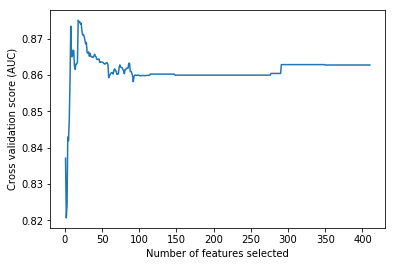

Run time: VarSelection.VarSelection.variable_selection.rfe ran in 16 min 17.68 sec


In [10]:
clf = LassoCV(max_iter=2000, tol = 2, cv = 2)
rfe_selection = var_selection.rfe(clf, 
                                  2, 
                                  'roc_auc')

In [11]:
rfe_selection

Index(['SPEND_PROD_CODE_52', 'QUANTITY_PROD_CODE_52', 'VISITS_PROD_CODE_52',
       'SPEND_PROD_CODE_26', 'QUANTITY_PROD_CODE_26', 'VISITS_PROD_CODE_26',
       'VISITS_PROD_CODE_10_52', 'SPEND_PROD_CODE_10_26',
       'QUANTITY_PROD_CODE_10_26', 'VISITS_PROD_CODE_10_26',
       'VISITS_PROD_CODE_20_52', 'VISITS_PROD_CODE_20_26',
       'VISITS_PROD_CODE_30_52', 'VISITS_PROD_CODE_40_52',
       'TIME_BTWN_RATIO_CUST_PROD_CODE_30',
       'BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_XX',
       'BASKET_PRICE_SENSITIVITY_VISITS_CUST_CODE_MM',
       'BASKET_SIZE_VISITS_CUST_CODE_L'],
      dtype='object')

### Feature Agglomeration

Run feature agglomeration to get clusters of related features

In [91]:
var_clusters = var_selection.feat_agglom(50, True)
var_clusters

Run time: VarSelection.VarSelection.variable_selection.feat_agglom ran in 3.07 sec


,features,Cluster_Number
349,BASKET_SIZE_PROP_SPEND_PROD_CODE_S,0
348,BASKET_SIZE_PROP_SPEND_PROD_CODE_M,0
351,BASKET_SIZE_PROP_QUANTITY_PROD_CODE_M,0
352,BASKET_SIZE_PROP_QUANTITY_PROD_CODE_S,0
380,BASKET_TYPE_PROP_VISITS_PROD_CODE_Small Shop,0
354,BASKET_SIZE_PROP_VISITS_PROD_CODE_M,0
355,BASKET_SIZE_PROP_VISITS_PROD_CODE_S,0
376,BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Small Shop,0
372,BASKET_TYPE_PROP_SPEND_PROD_CODE_Small Shop,0
304,BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...,1


### Merge metrics

Merge the results from squared correlation, absolute coefficients, RF Importance and RFE

In [13]:
# merge the feature agglomeration to the RF importance
comp = var_clusters.merge(rf_importance[['features','rf_importance','rf_rank']], on = 'features', how = 'left')

# merge the squared correlation
comp = comp.merge(squared_corr, on = 'features', how = 'left')

# merge the l1 regression absolute coefficents
lm_reg_coeff_l1 = lm_reg_coeff_l1.loc[:,['features','coeff_abs','coeff_rank']]
lm_reg_coeff_l1.rename(columns = {'coeff_abs':'coeff_abs_l1','coeff_rank':'coeff_rank_l1'}, inplace = True) 
comp = comp.merge(lm_reg_coeff_l1, on = 'features', how = 'left')

# merge the l2 regression absolute coefficents
lm_reg_coeff_l2 = lm_reg_coeff_l2.loc[:,['features','coeff_abs','coeff_rank']]
lm_reg_coeff_l2.rename(columns = {'coeff_abs':'coeff_abs_l2','coeff_rank':'coeff_rank_l2'}, inplace = True) 
comp = comp.merge(lm_reg_coeff_l2, on = 'features', how = 'left')

# Create a flag if the variable was selected during the RFE
in_rfe = pd.DataFrame(rfe_selection)
in_rfe.columns = ['features']
in_rfe.loc[:, 'selected_RFE'] = "Y"
comp = comp.merge(in_rfe, on = 'features', how = 'left')

comp

,features,Cluster_Number,rf_importance,rf_rank,Squared_Correlation,coeff_abs_l1,coeff_rank_l1,coeff_abs_l2,coeff_rank_l2,selected_RFE
0,BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Small Shop,0,0.001898,187.0,NaN,NaN,NaN,NaN,NaN,NaN
1,BASKET_SIZE_PROP_VISITS_PROD_CODE_S,0,0.001843,196.0,NaN,0.083432,33.0,0.127486,100.0,NaN
2,BASKET_SIZE_PROP_QUANTITY_PROD_CODE_M,0,0.002035,154.0,NaN,0.000000,177.0,NaN,NaN,NaN
3,BASKET_TYPE_PROP_SPEND_PROD_CODE_Small Shop,0,0.001824,198.0,NaN,NaN,NaN,0.070718,188.0,NaN
4,BASKET_SIZE_PROP_SPEND_PROD_CODE_M,0,0.001967,170.0,NaN,0.245457,11.0,0.235274,36.0,NaN
5,BASKET_TYPE_PROP_VISITS_PROD_CODE_Small Shop,0,NaN,NaN,NaN,NaN,NaN,0.082024,160.0,NaN
6,BASKET_SIZE_PROP_SPEND_PROD_CODE_S,0,0.001911,183.0,NaN,0.000000,179.0,0.195826,58.0,NaN
7,BASKET_SIZE_PROP_VISITS_PROD_CODE_M,0,0.001855,195.0,NaN,0.000000,174.0,0.127514,99.0,NaN
8,BASKET_SIZE_PROP_QUANTITY_PROD_CODE_S,0,0.001956,172.0,NaN,0.000000,175.0,NaN,NaN,NaN
9,BASKET_PRICE_SENSITIVITY_QUANTITY_CUST_CODE_LA,1,0.002008,161.0,0.047079,0.002386,85.0,0.320756,19.0,NaN


### Identify top features

Identify top features based on the tests above - selecting variables from the clusters to avoid colinearity and selecting the 'best' feature across the tests.

NOTE:  Keeping all user and item factors

In [6]:
top_features = train_df_var_eda[['TARGET',
                                 'CUST_PRICE_SENSITIVITY',
                                 'CUST_LIFESTAGE',
                                 'BASKET_SIZE_PROP_SPEND_PROD_CODE_M',
                                 'BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA',
                                 'DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON',
                                 'BASKET_SIZE_PROP_VISITS_CUST_CODE_L',
                                 'BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh',
                                 'BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop',
                                 'BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L',
                                 'STORE_FORMAT_PROP_VISITS_CUST_CODE_MS',
                                 'CHNG_VISITS_PROD_CODE_30_1_52',
                                 'STORE_FORMAT_PROP_SPEND_PROD_CODE_LS',
                                 'STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS',
                                 'BASKET_SIZE_QUANTITY_CUST_CODE_S',
                                 'BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood',
                                 'CHNG_SPEND_PROD_CODE_40_8_52',
                                 'BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX',
                                 'BASKET_TYPE_VISITS_CUST_CODE_XX',
                                 'WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND',
                                 'BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop',
                                 'SPEND_PROD_CODE_30_52',
                                 'BASKET_TYPE_SPEND_CUST_CODE_Top Up',
                                 'BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery',
                                 'CHNG_QUANTITY_PROD_CODE_40_26_52',
                                 'SPEND_PROD_CODE_20_52',
                                 'BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up',
                                 'VISITS_PROD_CODE_20_52',
                                 'WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND',
                                 'VISITS_PROD_CODE_40_1',
                                 'CHNG_VISITS_PROD_CODE_40_1_26',
                                 'BASKET_TYPE_PROP_SPEND_PROD_CODE_XX',
                                 'STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS',
                                 'DAY_PART_PROP_VISITS_CUST_CODE_EVENING',
                                 'TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40',
                                 'STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS',
                                 'DAY_PART_PROP_SPEND_PROD_CODE_MORNING',
                                 'STORE_FORMAT_PROP_SPEND_PROD_CODE_SS',
                                 'STORE_FORMAT_PROP_VISITS_PROD_CODE_MS',
                                 'DAY_PART_PROP_SPEND_CUST_CODE_MORNING',
                                 'BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA',
                                 'DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING',
                                 'BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM',
                                 'BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery',
                                 'BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM',
                                 'STORE_FORMAT_PROP_SPEND_CUST_CODE_LS',
                                 'QUANTITY_PROD_CODE_52',
                                 'BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up',
                                 'DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON',
                                 'CHNG_VISITS_PROD_CODE_20_1_8',
                                 'BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM',
                                 'BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX',
                                 'USER_factor_0',
                                 'USER_factor_1',
                                 'USER_factor_2',
                                 'USER_factor_3',
                                 'USER_factor_4',
                                 'ITEM_factor_0',
                                 'ITEM_factor_1',
                                 'ITEM_factor_2',
                                 'ITEM_factor_3',
                                 'ITEM_factor_4']]

### Best Subsets

Run best subsets on the top features from each of the variable clusters

In [ ]:
lr = linear_model.LogisticRegression(penalty = 'l1', C=0.01, solver = 'liblinear')
best_feature_subsets = var_selection.best_subsets(lr,
                                                  5,
                                                  top_features.columns.tolist())

In [ ]:
best_feature_subsets

### EDA

Run some EDA on the top featuers from each of the variable clusters

The feature CUST_PRICE_SENSITIVITY has 0 missing value(s) out of 29098
The feature CUST_LIFESTAGE has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_SPEND_PROD_CODE_M has 0 missing value(s) out of 29098
The feature BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA has 0 missing value(s) out of 29098
The feature DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_VISITS_CUST_CODE_L has 0 missing value(s) out of 29098
The feature BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh has 0 missing value(s) out of 29098
The feature BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L has 0 missing value(s) out of 29098
The feature STORE_FORMAT_PROP_VISITS_CUST_CODE_MS has 0 missing value(s) out of 29098
The feature CHNG_VISITS_PROD_CODE_30_1_52 has 0 missing value(s) out of 29098
The feature STORE_FORMAT_PROP_SPEND_PROD_CODE_LS has 0 missing value(s) out o

,BASKET_SIZE_PROP_SPEND_PROD_CODE_M
count,29098.000000
mean,0.195436
std,0.195220
min,0.000000
25%,0.050761
50%,0.157895
75%,0.254098
max,1.000000


Key stats for BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA


,BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA
count,29098.000000
mean,35.895793
std,88.728207
min,0.000000
25%,0.000000
50%,4.520000
75%,27.020000
max,1054.090000


Key stats for DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON


,DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON
count,29098.000000
mean,0.410128
std,0.276355
min,0.000000
25%,0.186335
50%,0.437817
75%,0.604729
max,1.000000


Key stats for BASKET_SIZE_PROP_VISITS_CUST_CODE_L


,BASKET_SIZE_PROP_VISITS_CUST_CODE_L
count,29098.000000
mean,0.522285
std,0.338299
min,0.000000
25%,0.250000
50%,0.538462
75%,0.819672
max,1.000000


Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh


,BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh
count,29098.000000
mean,0.477733
std,0.281826
min,0.000000
25%,0.250000
50%,0.529736
75%,0.672194
max,1.000000


Key stats for BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop


,BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop
count,29098.000000
mean,0.293914
std,0.273099
min,0.000000
25%,0.040000
50%,0.248000
75%,0.469697
max,1.000000


Key stats for BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L


,BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L
count,29098.000000
mean,0.713469
std,0.278091
min,0.000000
25%,0.650000
50%,0.791103
75%,0.905983
max,1.000000


Key stats for STORE_FORMAT_PROP_VISITS_CUST_CODE_MS


,STORE_FORMAT_PROP_VISITS_CUST_CODE_MS
count,29098.000000
mean,0.192432
std,0.340474
min,0.000000
25%,0.000000
50%,0.000000
75%,0.200000
max,1.000000


Key stats for CHNG_VISITS_PROD_CODE_30_1_52


,CHNG_VISITS_PROD_CODE_30_1_52
count,29098.000000
mean,0.009011
std,0.050580
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for STORE_FORMAT_PROP_SPEND_PROD_CODE_LS


,STORE_FORMAT_PROP_SPEND_PROD_CODE_LS
count,29098.000000
mean,0.634634
std,0.299063
min,0.000000
25%,0.494118
50%,0.670139
75%,0.862805
max,1.000000


Key stats for STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS


,STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS
count,29098.000000
mean,0.066764
std,0.226611
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for BASKET_SIZE_QUANTITY_CUST_CODE_S


,BASKET_SIZE_QUANTITY_CUST_CODE_S
count,29098.000000
mean,4.394391
std,11.446636
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,170.000000


Key stats for BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood


,BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood
count,29098.000000
mean,0.014365
std,0.072427
min,0.000000
25%,0.000000
50%,0.000000
75%,0.002519
max,1.000000


Key stats for CHNG_SPEND_PROD_CODE_40_8_52


,CHNG_SPEND_PROD_CODE_40_8_52
count,29098.000000
mean,0.064432
std,0.132157
min,0.000000
25%,0.000000
50%,0.000000
75%,0.102029
max,1.000000


Key stats for BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX


,BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX
count,29098.000000
mean,0.006229
std,0.030357
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for BASKET_TYPE_VISITS_CUST_CODE_XX


,BASKET_TYPE_VISITS_CUST_CODE_XX
count,29098.000000
mean,0.454327
std,2.925040
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,60.000000


Key stats for WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND


,WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND
count,29098.000000
mean,0.234251
std,0.160704
min,0.000000
25%,0.132353
50%,0.246575
75%,0.333333
max,1.000000


Key stats for BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop


,BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop
count,29098.000000
mean,27.668809
std,55.540871
min,0.000000
25%,1.000000
50%,8.000000
75%,29.000000
max,738.000000


Key stats for SPEND_PROD_CODE_30_52


,SPEND_PROD_CODE_30_52
count,29098.000000
mean,21.337943
std,61.100722
min,0.000000
25%,0.000000
50%,0.000000
75%,11.540000
max,1403.160000


Key stats for BASKET_TYPE_SPEND_CUST_CODE_Top Up


,BASKET_TYPE_SPEND_CUST_CODE_Top Up
count,29098.000000
mean,70.560287
std,116.646425
min,0.000000
25%,2.040000
50%,22.420000
75%,88.980000
max,1143.530000


Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery


,BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery
count,29098.000000
mean,0.098192
std,0.173510
min,0.000000
25%,0.000000
50%,0.027906
75%,0.105769
max,1.000000


Key stats for CHNG_QUANTITY_PROD_CODE_40_26_52


,CHNG_QUANTITY_PROD_CODE_40_26_52
count,29098.000000
mean,0.195887
std,0.270336
min,0.000000
25%,0.000000
50%,0.000000
75%,0.428571
max,1.000000


Key stats for SPEND_PROD_CODE_20_52


,SPEND_PROD_CODE_20_52
count,29098.000000
mean,11.525004
std,39.808808
min,0.000000
25%,0.000000
50%,0.000000
75%,6.020000
max,1403.160000


Key stats for BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up


,BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up
count,29098.000000
mean,0.378594
std,0.289111
min,0.000000
25%,0.113402
50%,0.339623
75%,0.625000
max,1.000000


Key stats for VISITS_PROD_CODE_20_52


,VISITS_PROD_CODE_20_52
count,29098.000000
mean,5.756409
std,13.388058
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,197.000000


Key stats for WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND


,WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND
count,29098.000000
mean,0.264224
std,0.158313
min,0.000000
25%,0.213333
50%,0.279070
75%,0.315789
max,1.000000


Key stats for VISITS_PROD_CODE_40_1


,VISITS_PROD_CODE_40_1
count,29098.000000
mean,0.257853
std,0.673956
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


Key stats for CHNG_VISITS_PROD_CODE_40_1_26


,CHNG_VISITS_PROD_CODE_40_1_26
count,29098.000000
mean,0.017815
std,0.067729
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for BASKET_TYPE_PROP_SPEND_PROD_CODE_XX


,BASKET_TYPE_PROP_SPEND_PROD_CODE_XX
count,29098.000000
mean,0.000876
std,0.015872
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS


,STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS
count,29098.000000
mean,0.047772
std,0.183230
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for DAY_PART_PROP_VISITS_CUST_CODE_EVENING


,DAY_PART_PROP_VISITS_CUST_CODE_EVENING
count,29098.000000
mean,0.310926
std,0.280299
min,0.000000
25%,0.041237
50%,0.275862
75%,0.478261
max,1.000000


Key stats for TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40


,TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40
count,29098.000000
mean,250.026651
std,162.697638
min,1.000000
25%,5.000000
50%,357.000000
75%,357.000000
max,357.000000


Key stats for STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS


,STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS
count,29098.000000
mean,0.069033
std,0.143249
min,0.000000
25%,0.000000
50%,0.000000
75%,0.073984
max,1.000000


Key stats for DAY_PART_PROP_SPEND_PROD_CODE_MORNING


,DAY_PART_PROP_SPEND_PROD_CODE_MORNING
count,29098.000000
mean,0.210159
std,0.179618
min,0.000000
25%,0.083333
50%,0.202532
75%,0.275154
max,1.000000


Key stats for STORE_FORMAT_PROP_SPEND_PROD_CODE_SS


,STORE_FORMAT_PROP_SPEND_PROD_CODE_SS
count,29098.000000
mean,0.058954
std,0.136488
min,0.000000
25%,0.000000
50%,0.000000
75%,0.060000
max,1.000000


Key stats for STORE_FORMAT_PROP_VISITS_PROD_CODE_MS


,STORE_FORMAT_PROP_VISITS_PROD_CODE_MS
count,29098.000000
mean,0.192321
std,0.220521
min,0.000000
25%,0.000000
50%,0.148542
75%,0.270248
max,1.000000


Key stats for DAY_PART_PROP_SPEND_CUST_CODE_MORNING


,DAY_PART_PROP_SPEND_CUST_CODE_MORNING
count,29098.000000
mean,0.190825
std,0.246654
min,0.000000
25%,0.000000
50%,0.095302
75%,0.277844
max,1.000000


Key stats for BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA


,BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA
count,29098.000000
mean,0.210079
std,0.239714
min,0.000000
25%,0.000000
50%,0.133333
75%,0.317647
max,1.000000


Key stats for DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING


,DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING
count,29098.000000
mean,0.294080
std,0.219484
min,0.000000
25%,0.162791
50%,0.277220
75%,0.379310
max,1.000000


Key stats for BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM


,BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM
count,29098.000000
mean,40.555618
std,92.320912
min,0.000000
25%,0.000000
50%,6.160000
75%,35.160000
max,1023.760000


Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery


,BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery
count,29098.000000
mean,0.093667
std,0.165052
min,0.000000
25%,0.000000
50%,0.035398
75%,0.095238
max,1.000000


Key stats for BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM


,BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM
count,29098.000000
mean,0.517442
std,0.258350
min,0.000000
25%,0.370370
50%,0.536926
75%,0.669528
max,1.000000


Key stats for STORE_FORMAT_PROP_SPEND_CUST_CODE_LS


,STORE_FORMAT_PROP_SPEND_CUST_CODE_LS
count,29098.000000
mean,0.603040
std,0.445631
min,0.000000
25%,0.023643
50%,0.926147
75%,1.000000
max,1.000000


Key stats for QUANTITY_PROD_CODE_52


,QUANTITY_PROD_CODE_52
count,29098.000000
mean,6.519520
std,31.419489
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,1327.000000


Key stats for BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up


,BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up
count,29098.000000
mean,0.404124
std,0.225911
min,0.000000
25%,0.285714
50%,0.421053
75%,0.508475
max,1.000000


Key stats for DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON


,DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON
count,29098.000000
mean,0.447267
std,0.218139
min,0.000000
25%,0.360000
50%,0.471627
75%,0.548617
max,1.000000


Key stats for CHNG_VISITS_PROD_CODE_20_1_8


,CHNG_VISITS_PROD_CODE_20_1_8
count,29098.000000
mean,0.034272
std,0.142270
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Key stats for BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM


,BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM
count,29098.000000
mean,0.467483
std,0.300969
min,0.000000
25%,0.225352
50%,0.500000
75%,0.711590
max,1.000000


Key stats for BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX


,BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX
count,29098.000000
mean,0.158657
std,2.448296
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,63.470000


Key stats for USER_factor_0


,USER_factor_0
count,29098.000000
mean,0.119604
std,0.130735
min,-0.296467
25%,0.026464
50%,0.075625
75%,0.181938
max,1.207607


Key stats for USER_factor_1


,USER_factor_1
count,29098.000000
mean,0.110931
std,0.147530
min,-0.247343
25%,0.006632
50%,0.063406
75%,0.164448
max,0.890174


Key stats for USER_factor_2


,USER_factor_2
count,29098.000000
mean,0.116983
std,0.142207
min,-0.260684
25%,0.017477
50%,0.080890
75%,0.180891
max,1.038227


Key stats for USER_factor_3


,USER_factor_3
count,29098.000000
mean,0.114316
std,0.140200
min,-0.362994
25%,0.016593
50%,0.072257
75%,0.166992
max,1.231359


Key stats for USER_factor_4


,USER_factor_4
count,29098.000000
mean,0.105567
std,0.136243
min,-0.340687
25%,0.011452
50%,0.063563
75%,0.154504
max,0.898129


Key stats for ITEM_factor_0


,ITEM_factor_0
count,29098.000000
mean,0.075966
std,0.082632
min,-0.182919
25%,0.022977
50%,0.052222
75%,0.104937
max,0.616507


Key stats for ITEM_factor_1


,ITEM_factor_1
count,29098.000000
mean,0.074007
std,0.093645
min,-0.140810
25%,0.013294
50%,0.057724
75%,0.111031
max,0.814985


Key stats for ITEM_factor_2


,ITEM_factor_2
count,29098.000000
mean,0.074666
std,0.098605
min,-0.139259
25%,0.008778
50%,0.049681
75%,0.111592
max,0.816398


Key stats for ITEM_factor_3


,ITEM_factor_3
count,29098.000000
mean,0.070546
std,0.081994
min,-0.149297
25%,0.018594
50%,0.054059
75%,0.108207
max,0.565114


Key stats for ITEM_factor_4


,ITEM_factor_4
count,29098.000000
mean,0.076509
std,0.090280
min,-0.172411
25%,0.015178
50%,0.054676
75%,0.112094
max,0.645711


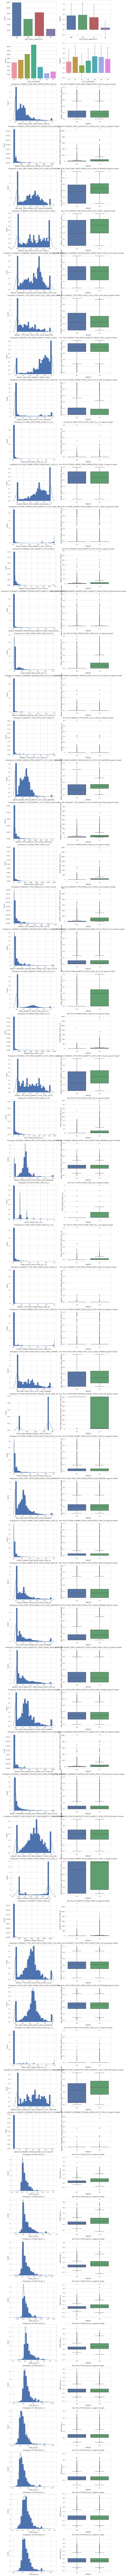

In [7]:
feat_list = top_features.columns.tolist()
feat_list.remove('TARGET')

fp.feature_profiling(df = top_features, 
                      feat = feat_list, 
                      target = 'TARGET',
                      hist_bins = 25)